<a href="https://colab.research.google.com/github/Pralay567/Iris-DecisionTree-MLTask/blob/main/StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 2) Stock Prices Data Set.csv to 2) Stock Prices Data Set (3).csv
Columns: ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']
  symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391

Preview with Trend:
             date    close  next_close  trend
1     2014-01-02  79.0185     77.2828      0
484   2014-01-03  77.2828     77.7042      1
967   2014-01-06  77.7042     77.1481      0
1450  2014-01-07  77.1481     77.6371      1
1933  2014-01-08  77.6371     76.6455      0

Accuracy: 0.5544554455445545

Classification Report:
               precision    recall  f1-score   support

        Down       0.55      0

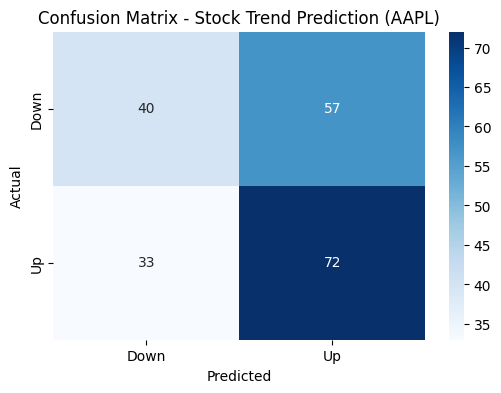

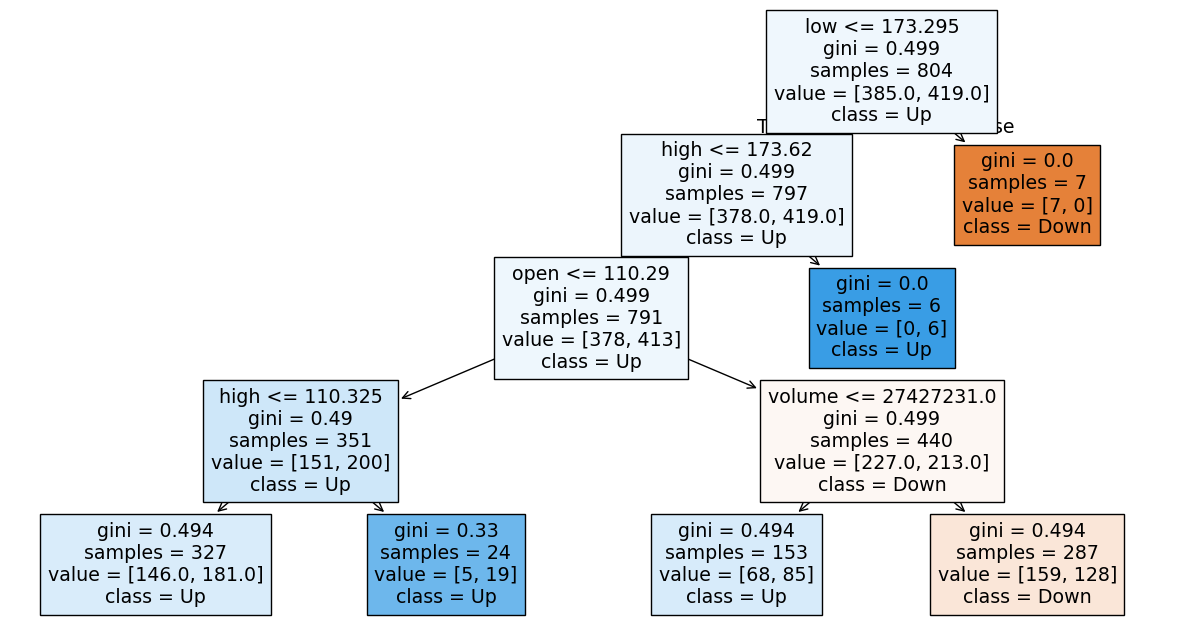

In [3]:
# ==============================
# 1. Import libraries
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==============================
# 2. Load dataset
# ==============================
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Stock Prices Data Set.csv")  # or the renamed file
print("Columns:", df.columns.tolist())
print(df.head())

# ==============================
# 3. Select one stock (example: AAPL) and create Trend column
# ==============================
# Filter for a single stock symbol (important, otherwise mixing companies)
df_stock = df[df['symbol'] == 'AAPL'].copy()

# Create next day close
df_stock['next_close'] = df_stock['close'].shift(-1)
df_stock['trend'] = (df_stock['next_close'] > df_stock['close']).astype(int)

# Drop last row with NaN
df_stock = df_stock.dropna()

print("\nPreview with Trend:\n", df_stock[['date','close','next_close','trend']].head())

# ==============================
# 4. Features & Target
# ==============================
X = df_stock[['open','high','low','close','volume']]
y = df_stock['trend']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 5. Train Decision Tree
# ==============================
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# ==============================
# 6. Evaluation
# ==============================
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Down","Up"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Down","Up"], yticklabels=["Down","Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stock Trend Prediction (AAPL)")
plt.show()

# ==============================
# 7. Visualize Decision Tree
# ==============================
plt.figure(figsize=(15,8))
plot_tree(clf, feature_names=X.columns, class_names=["Down","Up"], filled=True)
plt.show()
